# Topics in Computer Science - Bitcoin: Programming the Future of Money - ITCS 4010 & 5010 - Spring 2025 - UNC Charlotte

# Homework 6 - Merkle Trees, Testnet, Key Aggregation (60 Points)

Name of Student:

<br>

<br>

Charlotte ID:

List of students collaborated with:

# <font color="blue"> Submission instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of all cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a PDF version showing the code and the output of all cells, and save it in the same folder that contains the notebook file.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly.
7. Submit **both** your PDF and the notebook file .ipynb on Gradescope.
8. Make sure your your Gradescope submission contains the correct files by downloading it after posting it on Gradescope.

### Make sure you have the output of all cells in the PDF version.

In [1]:
from helper import little_endian_to_int, hash256

### Exercise 1 (10 Points)

Recall that Merkle Trees are used to efficiently and securely organize transaction data in blocks. They facilitate in verifying transactions in a block without having to process each transaction individually, hence decreasing computing and storage needs.

Using the Merkle Tree diagram provided below, write a function `BuildTree` that builds the complete Merkle Tree from a list of leaf node data. The function should hash the data sequentially using the `hash256` function provided above and return the resulting Merkle Tree as a dictionary and the Merkle root, with all hashes in hexadecimal format."

$\textbf{Figure 1}$

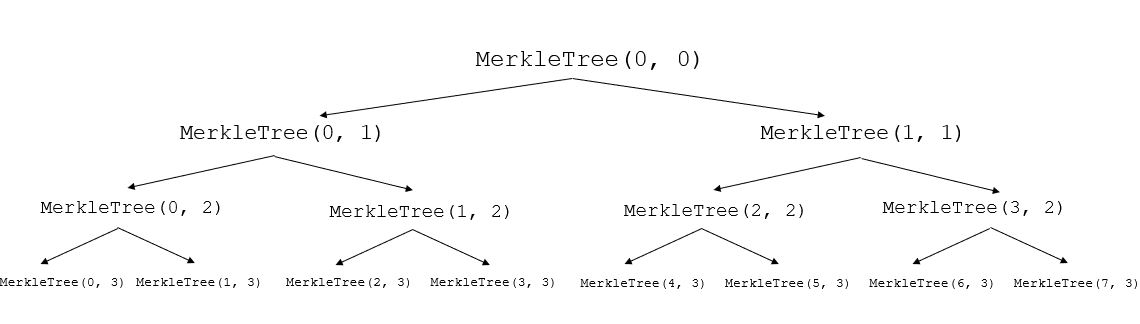


Feel free to use the imported `hash256` function from `helper.py`


In [2]:
import math
def BuildTree(data):
    MerkleTree = {}
    n = int(math.log(len(data), 2))			# Use log base 2
    # Build the bottom layer
    for i in range(2 ** n):
    	MerkleTree[(i, n)] = hash256(data[i])
    # Build each parent based off the children
    for j in range (n-1, -1, -1):
    	for i in range(2 ** j):
    		# Each parent @ (i, j) has children: (2i, j + 1) and (2i + 1, j + 1)
    			MerkleTree[(i, j)] = hash256(MerkleTree[(2*i, j + 1)] + MerkleTree[((2*i) + 1, j + 1)])
    roothash = MerkleTree[(0, 0)].hex()
    for i in MerkleTree:
        MerkleTree[i] = MerkleTree[i].hex()
    return MerkleTree, roothash


**Test the function `BuildTree` by printing the output of its application to the data in list `data`.**
<br> Make sure all Merkle hashes displayed are in hexadecimal format.

In [3]:
data = []
for i in range(8):
    data.append(str(i).encode())

In [4]:
#Construct Merkle Tree using the BuildTree function and data.
MerkleTree, roothash = BuildTree(data)

#Print the Merkle Tree 
print("Merkle Tree example:", MerkleTree) 

In [5]:
#Print the root hash
print("The Merkle root hash is:", roothash)

The Merkle root hash is: 44d445ab227c5b4070144061e86ac8323da03d10f279c0c7ce5bd133cde99f40


In [6]:
#Print the length of the Merkle Tree
print("The length of tree is:",  round(math.log(len(MerkleTree.keys()), 2)))

The length of tree is: 4


### Exercise 2 (10 Points)

For a Merkle Tree of height 4 as shown in Exercise 1, given the following hashes (in hex format) of the tree,

* MerkleTree(0, 0) = 58947e812d9bfe2d19cf074798c82c4a67425ddbbd06f964df60eab06e5528f1
* MerkleTree(4, 3) = 88f78c1046639b63b4ed955562e77f7f629cbaf4b1d4be2e2ced0b018d1e975a
* MerkleTree(3, 2) = 12b0c2c2b54b1a4419cc7cf8e101b11e0c7a96543f4587dcadfd087485a94221
* MerkleTree(0, 1) = c7cd42509889acd266b6f7f0b2b04fb7e734189bcc70f6d5f633622c97a658b9

**a)** You want to determine whether the _sixth_ leaf of the Merkle tree contains a specific data value. 
<br>
Which of the data above is the corresponding
- Merkle root
and 
- Merkle proof
?

The Merkle root corresponds to the data labelled with `MerkleTree(0,0)`, i.e.,

In [7]:
MerkleTree00= '58947e812d9bfe2d19cf074798c82c4a67425ddbbd06f964df60eab06e5528f1'

The Merkle proof for the data at the sixth leaf (corresponding to label `MerkleTree(5,3)`) corresponds to the remainder of the data:
* MerkleTree(4, 3) = 88f78c1046639b63b4ed955562e77f7f629cbaf4b1d4be2e2ced0b018d1e975a
* MerkleTree(3, 2) = 12b0c2c2b54b1a4419cc7cf8e101b11e0c7a96543f4587dcadfd087485a94221
* MerkleTree(0, 1) = c7cd42509889acd266b6f7f0b2b04fb7e734189bcc70f6d5f633622c97a658b9

The hex data corresponding to these labels can be used, if the Merkle root is given, to verify whether a certain leaf data actually 

**b)** Write a Python function that determines whether or not the _sixth_ leaf of the Merkle tree of height $4$ represented by the Merkle root `root`, Merkle proof `proof` contains the leaf data `leafdata`.

In [8]:
#YOUR CODE HERE
def combine(h1, h2):
    h12 = hash256(h1+h2)
    return h12

In [9]:
proof = []
proofnode = {}
proofnode['data'] = bytes.fromhex('88f78c1046639b63b4ed955562e77f7f629cbaf4b1d4be2e2ced0b018d1e975a')
proofnode['index'] = 4
proof.append(proofnode)
proofnode = {}
proofnode['data'] = bytes.fromhex('12b0c2c2b54b1a4419cc7cf8e101b11e0c7a96543f4587dcadfd087485a94221')
proofnode['index'] = 3
proof.append(proofnode)
proofnode = {}
proofnode['data'] = bytes.fromhex('c7cd42509889acd266b6f7f0b2b04fb7e734189bcc70f6d5f633622c97a658b9')
proofnode['index'] = 0
proof.append(proofnode)

In [10]:
proof

[{'data': b'\x88\xf7\x8c\x10Fc\x9bc\xb4\xed\x95Ub\xe7\x7f\x7fb\x9c\xba\xf4\xb1\xd4\xbe.,\xed\x0b\x01\x8d\x1e\x97Z',
  'index': 4},
 {'data': b'\x12\xb0\xc2\xc2\xb5K\x1aD\x19\xcc|\xf8\xe1\x01\xb1\x1e\x0cz\x96T?E\x87\xdc\xad\xfd\x08t\x85\xa9B!',
  'index': 3},
 {'data': b'\xc7\xcdBP\x98\x89\xac\xd2f\xb6\xf7\xf0\xb2\xb0O\xb7\xe74\x18\x9b\xccp\xf6\xd5\xf63b,\x97\xa6X\xb9',
  'index': 0}]

In [11]:
def check_Merkle_proof(leafdata,root,proof):
    node = {}
    node['index'] = 5
    node['data'] = hash256(leafdata.encode())
    for proofpart in proof:
        if proofpart['index'] < node['index']:
            data = combine(proofpart['data'], node['data'])
            index = proofpart['index']/2
        else:
            data = combine(node['data'],proofpart['data'])
            index = node['index']/2
        node['index'] = index
        node['data'] = data
    return node['data'] == bytes.fromhex(root)

**c)** Test your code from **b)** by using it whether the sixth leaf of the Merkle tree is the string `'Bitcoin'`, and print the result.

In [12]:
#YOUR CODE HERE
leafdata = 'Bitcoin'
boolean = check_Merkle_proof(leafdata,MerkleTree00,proof)
print('Merkle proof is correct:',boolean)

Merkle proof is correct: True


### Exercise 3 (10 Points)

Using the `PrivateKey` class from `ecc.py`, generate a private key with a secret of your choice. 

(Keep your secret and private key confidential; do not share them with anyone.)

**Note:** There is no need to print the private key or reveal the secret. You can leave the secret field blank in your submission.

In [13]:
from ecc import PrivateKey
from helper import little_endian_to_int, hash256

In [14]:
secretstring = b'TestString_123456'
secret = little_endian_to_int(hash256(secretstring))
private_key = PrivateKey(secret)

Generate a testnet address from your private key and print the resulting address.

In [15]:
print(private_key.point.address(testnet=True))


mpYJguG5tbVqWW7MeDWkUxxkP1gs8VbfZp


### Exercise 4 (10 Points)

Once you have an address, obtain at least $0.001 tBTC$ ("Testnet Bitcoin") from a the testnet4 faucet to be sent to your P2PKH testnet address from Exercise 3.
Obtains to obtain these coins are:
- [Testnet4.dev](https://faucet.testnet4.dev/)
- [Coinfacuet](https://coinfaucet.eu/en/btc-testnet4/)
- [mempool.space](https://mempool.space/testnet4) **Note:** This option requires signing up for an account on mempool.space to access the faucet. You might need to create a GitHub account using with your @charlotte.edu address to do this.

Provide a screenshot from mempool.space displaying the Inputs and Outputs of your faucet transaction.

### Exercise 5 (20 Points): Key Aggregation through Schnorr Signatures.

We learnt in class about the [MuSig](https://bitcoinops.org/en/topics/musig/) key aggregation protocol to implement scriptless $k$-of-$k$ multisignatures.

To simplify the protocol, we consider the following alternative protocol for implemented key aggregation for a $3$-of-$3$ multisignature involving Alice, Bob and Charlie, which also builds on the Schnorr signature scheme.

The key generation works as follows:

1. Alice, Bob and Charlie are in the possession of private keys $e_A$, $e_B$ and $e_C$ that they keep secret for themselves, respectively.
2. Alice derives public key $P_A = e_A G$, Bob derives public key $P_B = e_B G$ and Charlie derives public key $P_C =e_C G$.
3. Alice, Bob and Charlie exchange the public keys $P_A$, $P_B$ and $P_C$ with each other. 
4. The aggregrated public key is computed as $P:= P_A + P_B + P_C$ (which can be done by each participant).

Subsequently, the nonce generation and data exchange works as follows:

1. Alice, Bob and Charlie randomly generate private nonces $k_A$, $k_B$ and $k_C$, respectively.
2. Alice derives public nonce $R_A = k_A G$, Bob derives public nonce $R_B = k_B G$ and Charlie derives public nonce $R_C =k_C G$.
3. Alice, Bob and Charlie exchange the public noncesa $R_A$, $R_B$ and $R_C$ with each other. 
4. The aggregrated public nonce is computed as $R:= R_A + R_B + R_C$  (which can be done by each participant).

The generation of the aggregated signature works as follows:
1. Alice computes partial signature $s_A = k_A + \operatorname{hash}(R || P || m) e_A$, Bob computes partial signature $s_B = k_B + \operatorname{hash}(R || P || m) e_B$, and Charlie computes partial signature $s_C = k_C + \operatorname{hash}(R || P || m) e_C$.
2. Participants share the values of $s_A$, $s_B$ and $s_C$ with each other.
3. The aggregated signature is $s = s_A + s_B+ s_C$. 

($m$ is the message to be signed).

After following these steps, $(s,R)$ is the valid signature output that will return "True" in Schnorr's verification function corresponding to aggregated public key $P$ and message $m$.

**How can Charlie create a valid aggregated signature for the aggregated public key without the access to Alice's or Bob's partial signature $s_A$ and $s_B$, by acting dishonest? <br> <br>
Describe how this attack works and explain why it works.**


In the key generation part of the protocol, if the exchange of the public keys is not exactly simultaneous, Charlie could wait to receive the public keys $P_A$ and $P_B$ of Alice and Bob and then pretend to Alice and Bob that his public key is 
$$P_C' = P_C - P_A - P_B$$
where $P_C$ is the _actual_ public key $P_C = e_C G$ for which he possesses the private key $e_C$.

Then, the aggregated public key will be 
$$P = P_A + P_B + P_C'$$
which coincides with
$$ P = P_A + P_B + (P_C - P_A - P_B)  = P_C $$,
which is _exactly_ Charlie's original public key, for which is able to create signatures.

However, just by manipulating the key exchange, is not necessarily sufficient create a suitable signature for Charlie without access to $s_A$ and $s_B$. To make an attack work, Charlie could also be dishonest in the data exchange of the public nonces: After receiving the public nonces $R_A$ and $R_B$ of Alice and Bob, he could claim that his nonce is $R_C' = R_C - R_A - R_B$ and publish $R_A'$ instead of $R_A$. In this case, the aggregated public nonce is $R = R_A + R_B + R_C' =  R_A + R_B + (R_C - R_A - R_B) = R_C$.

In this case, a valid signature can be constructed by Charlie via 
$s = k_C + \operatorname{hash}(R_C || P_C || m) e_C$.

This attack works as this signature satisfies the verifcation equation 
$$ s G = \operatorname{hash}(R || P || m) P + R $$
for the following reason:
\begin{align}
s G &= (k_C + \operatorname{hash}(R_C || P_C || m) e_C) G \\
&= k_C G + \operatorname{hash}(R_C || P_C || m) e_C G 
\\ &= R_C + \operatorname{hash}(R_C || P_C || m) P_C \\
&= R + \operatorname{hash}(R || P || m) P
\end{align}

In the second equality, we used the linearity of elliptic curve point addition. In the third equality, we used the equations $R_C = k_C G$ and $P_C = e_C G$ corresponding to the public/private nonce relationship of Charlie's nonce and the public-private key equation of Charlie. In the last equality, we used that the aggregated nonce is $R = R_C$ and the aggregated public key is $P = P_C$, respectively.